# Proyek Pertama : Membuat Model NLP dengan TensorFlow
- Nama: Ananta Alfallah Tarigan
- Email: anantar437471@gmail.com
- Id Dicoding: ananta_alfallah

In [2]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

separator = " ::: "
column_names = ['ID', 'TITLE', 'GENRE', 'SUMMARY']
df = pd.read_csv('data2.txt', sep=separator, names=column_names, engine='python')

print(df.head())

   ID                             TITLE     GENRE  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                             SUMMARY  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       54214 non-null  int64 
 1   TITLE    54214 non-null  object
 2   GENRE    54214 non-null  object
 3   SUMMARY  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [4]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [5]:
df.groupby(by='GENRE').SUMMARY.nunique().sort_values(ascending=False)

GENRE
drama          13578
documentary    13079
comedy          7432
short           5062
horror          2204
thriller        1591
action          1313
western         1032
reality-tv       883
family           776
adventure        775
music            719
romance          671
sci-fi           647
adult            589
crime            504
animation        498
sport            430
talk-show        388
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: SUMMARY, dtype: int64

In [6]:
#Memilih 3 kelas
kelas_genre = ['documentary','horror','action']
df = df[df['GENRE'].isin(kelas_genre)] 

In [7]:
#Melakukan undersampling agar sampel jumlah sampel data sama untuk masing2 kelas

documentary_data = df[df['GENRE'] == 'documentary']
horror_data = df[df['GENRE'] == 'horror']
action_data = df[df['GENRE'] == 'action']


num_samples_action = len(action_data)

undersampled_documentary= documentary_data.sample(n=num_samples_action, replace=False, random_state=1337)
undersampled_horror = horror_data.sample(n=num_samples_action, replace=False, random_state=1337)


df_undersampled = pd.concat([undersampled_horror, undersampled_documentary, action_data])

df_undersampled = df_undersampled.sample(frac=1, random_state=1337).reset_index(drop=True)

print(df_undersampled['GENRE'].value_counts()) #dataset yang digunakan berjumlah 3945 sampel

GENRE
documentary    1315
action         1315
horror         1315
Name: count, dtype: int64


In [8]:
df_undersampled.drop(columns=['ID', 'TITLE'], inplace=True)

In [9]:
df_undersampled

,GENRE,SUMMARY
0,documentary,Ancient stone structures have been discovered ...
1,action,Squad with new characters with Courtney 357 fa...
2,action,Mechanic Ashe Corven and his son Danny are bru...
3,action,"It's been one year since the ""Overachievers"" s..."
4,documentary,The Unplaceables is a feature length documenta...
...,...,...
3940,action,"Sunil Shrivastava (Suniel Shetty), is the son ..."
3941,horror,"Each week on her local cable show ""The Seance ..."
3942,horror,Two friends Johnny and Jack go out in the wood...
3943,horror,A group of unlikely bunk mates gather at a mut...


In [10]:
#Menghilangkan kata2 yang dirasa tidak diperlukan dan tanda baca

stop_words = set(stopwords.words('english'))

def remove_stopwords_punctuation(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word.lower() for word in tokens if (word.lower() not in stop_words and word.lower() not in string.punctuation)]
    return ' '.join(filtered_tokens)

df_undersampled['SUMMARY'] = df_undersampled['SUMMARY'].apply(remove_stopwords_punctuation)

df_undersampled

,GENRE,SUMMARY
0,documentary,ancient stone structures discovered america th...
1,action,squad new characters courtney 357 facing forme...
2,action,mechanic ashe corven son danny brutally murder...
3,action,'s one year since `` overachievers '' series r...
4,documentary,unplaceables feature length documentary need i...
...,...,...
3940,action,sunil shrivastava suniel shetty son freedom fi...
3941,horror,week local cable show `` seance hour '' medium...
3942,horror,two friends johnny jack go woods looking body ...
3943,horror,group unlikely bunk mates gather mutual friend...


In [11]:
category = pd.get_dummies(df_undersampled.GENRE, dtype=int)
new_df = pd.concat([df_undersampled, category], axis=1)
new_df = new_df.drop(columns='GENRE')

In [12]:
new_df

,SUMMARY,action,documentary,horror
0,ancient stone structures discovered america th...,0,1,0
1,squad new characters courtney 357 facing forme...,1,0,0
2,mechanic ashe corven son danny brutally murder...,1,0,0
3,'s one year since `` overachievers '' series r...,1,0,0
4,unplaceables feature length documentary need i...,0,1,0
...,...,...,...,...
3940,sunil shrivastava suniel shetty son freedom fi...,1,0,0
3941,week local cable show `` seance hour '' medium...,0,0,1
3942,two friends johnny jack go woods looking body ...,0,0,1
3943,group unlikely bunk mates gather mutual friend...,0,0,1


In [13]:
summary = new_df['SUMMARY'].values
y = new_df[['action','documentary','horror']].values

rataan: 427.6060836501901
maks panjang: 5333
min panjang: 64


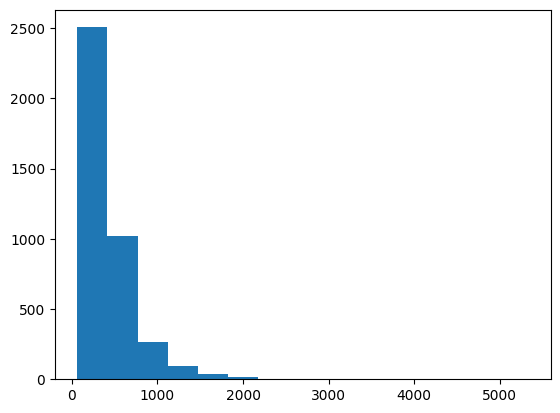

In [14]:
#melihat statistik data akhir yang akan digunakan

import matplotlib.pyplot as plt
panjang=[]
for i in summary:
    panjang.append(len(i))

print('rataan:', sum(panjang)/len(panjang))
print('maks panjang:', max(panjang))
print('min panjang:', min(panjang))

plt.hist(x=panjang, bins=15)
plt.show()

In [15]:
max_length = max(panjang)

max_length_summaries = df_undersampled[df_undersampled['SUMMARY'].apply(lambda x: len(x)) >= 3000]

print("Rows with summaries having the maximum length:")
print(max_length_summaries)

Rows with summaries having the maximum length:
            GENRE                                            SUMMARY
602        horror  old evil spirit horace granger old evil spirit...
917   documentary  lawless america ... movie exposing fact live l...
1439       horror  christine villier betrothed jacques despard me...
2998       horror  june 5 1944 early morning hours opening invasi...


In [16]:
from sklearn.model_selection import train_test_split
summary_latih, summary_test, y_latih, y_test = train_test_split(summary, y, test_size=0.2)

In [17]:
y_test

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [18]:
tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(summary_latih) 
 
sekuens_latih = tokenizer.texts_to_sequences(summary_latih)
sekuens_test = tokenizer.texts_to_sequences(summary_test)

padded_latih = pad_sequences(sekuens_latih, maxlen=300, padding='post', truncating='post')
padded_test = pad_sequences(sekuens_test, maxlen=300, padding='post', truncating='post')

In [27]:
import tensorflow as tf

model = Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=15, input_length=300), #Embedding
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24,dropout=0.8, recurrent_dropout=0.8)), #LSTM
    tf.keras.layers.Dense(3, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [28]:
from keras.callbacks import Callback

class StopTrainingCallback(Callback):
    def __init__(self, threshold=0.9):
        super(StopTrainingCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= self.threshold:
            print(f"\nAkurasi validasi menyentuh {self.threshold*100:.2f}%.")
            self.model.stop_training = True

In [29]:
stop_callback = StopTrainingCallback(threshold=0.91)

history = model.fit(padded_latih, y_latih, epochs=400,
                    validation_data=(padded_test, y_test),
                    batch_size=32,
                    steps_per_epoch=25,
                    validation_steps=5,
                    callbacks= [stop_callback],
                    verbose=2)

Epoch 1/400
25/25 - 12s - loss: 1.0999 - accuracy: 0.3050 - val_loss: 1.0975 - val_accuracy: 0.3875 - 12s/epoch - 497ms/step
Epoch 2/400
25/25 - 7s - loss: 1.0987 - accuracy: 0.3113 - val_loss: 1.0984 - val_accuracy: 0.3250 - 7s/epoch - 299ms/step
Epoch 3/400
25/25 - 7s - loss: 1.0985 - accuracy: 0.3400 - val_loss: 1.0991 - val_accuracy: 0.3250 - 7s/epoch - 290ms/step
Epoch 4/400
25/25 - 7s - loss: 1.0981 - accuracy: 0.3325 - val_loss: 1.0970 - val_accuracy: 0.4000 - 7s/epoch - 263ms/step
Epoch 5/400
25/25 - 7s - loss: 1.0951 - accuracy: 0.3600 - val_loss: 1.0940 - val_accuracy: 0.4250 - 7s/epoch - 261ms/step
Epoch 6/400
25/25 - 7s - loss: 1.0943 - accuracy: 0.3787 - val_loss: 1.0943 - val_accuracy: 0.4062 - 7s/epoch - 261ms/step
Epoch 7/400
25/25 - 7s - loss: 1.0900 - accuracy: 0.4150 - val_loss: 1.0848 - val_accuracy: 0.5312 - 7s/epoch - 263ms/step
Epoch 8/400
25/25 - 6s - loss: 1.0674 - accuracy: 0.4797 - val_loss: 1.0330 - val_accuracy: 0.4875 - 6s/epoch - 260ms/step
Epoch 9/400
25

akurasi telah lebih dari 90% -> 0.9187

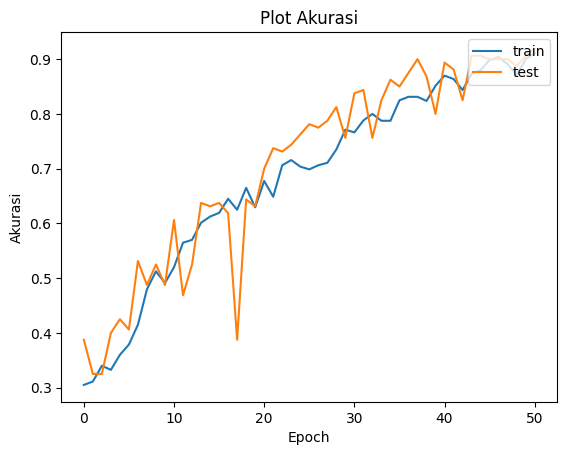

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Plot Akurasi')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

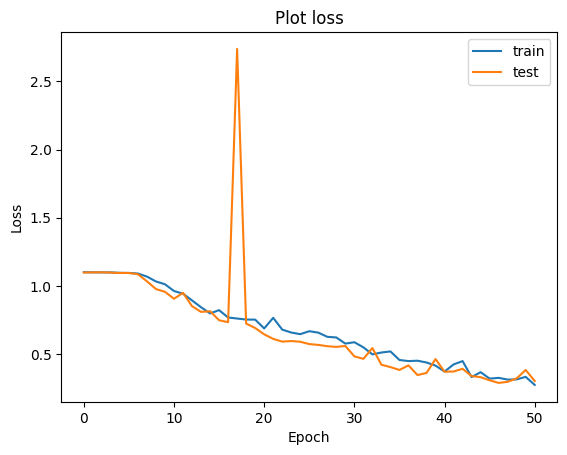

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()